In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import seaborn as sns

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/home/otavio/ml/datasets/World_Data/suicide/master.csv')

In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None
               year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000  

In [4]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
data = data[data['year'] != 2016]

year
1985    116063
1986    120670
1987    126842
1988    121026
1989    160244
1990    193361
1991    198020
1992    211473
1993    221565
1994    232063
1995    243544
1996    246725
1997    240745
1998    249591
1999    256119
2000    255832
2001    250652
2002    256095
2003    256079
2004    240861
2005    234375
2006    233361
2007    233408
2008    235447
2009    243487
2010    238702
2011    236484
2012    230160
2013    223199
2014    222984
2015    203640
Name: suicides_no, dtype: int64

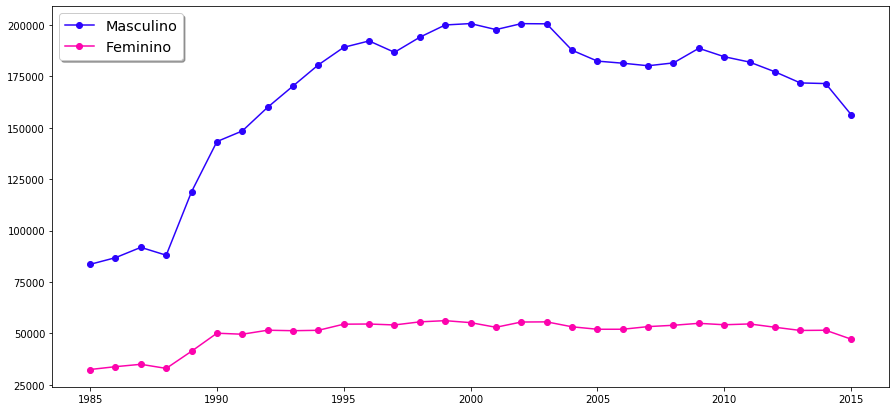

In [72]:
fig, ax = plt.subplots(figsize=(15,7))
# sui = data.groupby(['year', 'sex'])['suicides_no'].sum().unstack().plot(ax=ax)
sui = data.groupby(['year', 'sex'])['suicides_no'].sum().unstack()
ax.plot(sui.index, sui['male'], marker='o', c='#2c03fc', label='Masculino')
ax.plot(sui.index, sui['female'], marker='o', c='#fc03ad', label='Feminino')
ax.legend(loc='upper left', shadow=True, fontsize='x-large')
fig.savefig('out1.png')

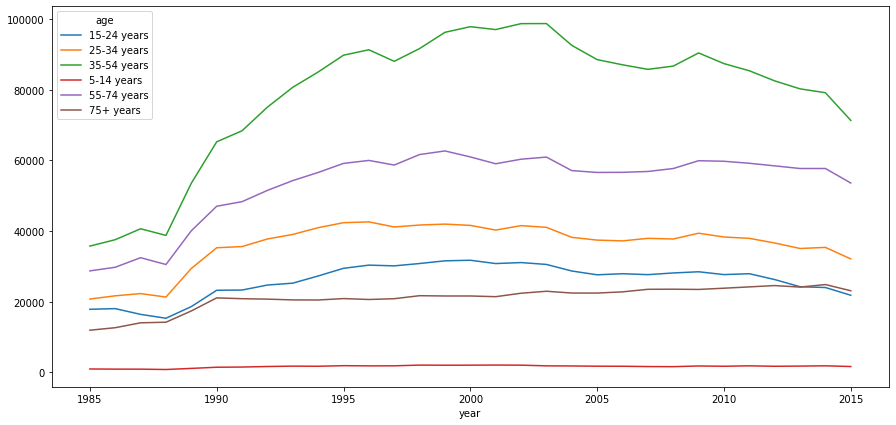

In [73]:
fig, ax = plt.subplots(figsize=(15,7))
age = data.groupby(['year', 'age'])['suicides_no'].sum().unstack().plot(ax=ax)
fig.savefig('out2.png')

In [70]:
d2015 = data[data['year'] == 2015][['country', 'suicides/100k pop', 'age']]
c = d2015.groupby('country')['suicides/100k pop'].mean()
c.sort_values().head(10)

country
Grenada                         0.000000
South Africa                    1.083333
Antigua and Barbuda             1.301667
Qatar                           1.570000
Saint Vincent and Grenadines    2.340000
Turkey                          2.372500
Turkmenistan                    2.373333
Guatemala                       3.737500
Panama                          3.741667
Armenia                         3.773333
Name: suicides/100k pop, dtype: float64

In [71]:
c.sort_values().tail(10)

country
Croatia               19.140000
Russian Federation    19.743333
Kazakhstan            19.835000
Ukraine               20.393333
Latvia                20.955833
Hungary               21.439167
Slovenia              22.067500
Uruguay               22.501667
Lithuania             32.123333
Republic of Korea     32.428333
Name: suicides/100k pop, dtype: float64